# SafeDine Toronto

In [236]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [237]:
#read the dataset
df=pd.read_csv("Robbery_Open_Data.csv")
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,6.327780e-09,5.664924e-09,1,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
1,-8.837002e+06,5.413576e+06,2,GO-20141262818,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,210,Robbery - Business,Robbery,167,Church-Wellesley,75,Church-Yonge Corridor (75),-79.384137,43.663899
2,-8.838988e+06,5.411068e+06,3,GO-20141260912,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,100,Robbery With Weapon,Robbery,164,Wellington Place,78,Kensington-Chinatown (78),-79.401983,43.647598
3,6.327780e-09,5.664924e-09,4,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,200,Robbery - Mugging,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
4,-8.851702e+06,5.419157e+06,5,GO-20141262644,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,150,Robbery - Purse Snatch,Robbery,113,Weston,113,Weston (113),-79.516192,43.700155


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33921 entries, 0 to 33920
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  33921 non-null  float64
 1   Y                  33921 non-null  float64
 2   OBJECTID           33921 non-null  int64  
 3   EVENT_UNIQUE_ID    33921 non-null  object 
 4   REPORT_DATE        33921 non-null  object 
 5   OCC_DATE           33921 non-null  object 
 6   REPORT_YEAR        33921 non-null  int64  
 7   REPORT_MONTH       33921 non-null  object 
 8   REPORT_DAY         33921 non-null  int64  
 9   REPORT_DOY         33921 non-null  int64  
 10  REPORT_DOW         33921 non-null  object 
 11  REPORT_HOUR        33921 non-null  int64  
 12  OCC_YEAR           33919 non-null  float64
 13  OCC_MONTH          33919 non-null  object 
 14  OCC_DAY            33919 non-null  float64
 15  OCC_DOY            33919 non-null  float64
 16  OCC_DOW            339

### Data Cleaning

In [239]:
#checking for null values
df.isnull().sum()

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             2
OCC_MONTH            2
OCC_DAY              2
OCC_DOY              2
OCC_DOW              2
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

In [240]:
#view rows with any null values
null_rows = df[df.isnull().any(axis=1)]
null_rows

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
4095,-8.826908e+06,5.431786e+06,4096,GO-2015198520,2015/02/03 05:00:00+00,1980/04/24 04:00:00+00,2015,February,3,34,...,1610,120,Robbery - Armoured Car,Robbery,118,Tam O'Shanter-Sullivan,118,Tam O'Shanter-Sullivan (118),-79.293463,43.78212
17211,-8.826162e+06,5.432018e+06,17212,GO-20181308752,2018/07/18 04:00:00+00,1996/03/06 05:00:00+00,2018,July,18,199,...,1610,110,Robbery - Financial Institute,Robbery,128,Agincourt South-Malvern West,128,Agincourt South-Malvern West (128),-79.286766,43.78362


Remove all the rows with null values

In [241]:
df=df.dropna()


In [242]:
df.isnull().sum()

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

In [243]:
# Check for duplicate records
duplicate_rows = df[df.duplicated()]

# Print duplicate rows
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows)

# Drop duplicate records
df.drop_duplicates(inplace=True)

# Check if duplicates are dropped
print("Duplicate records dropped. DataFrame shape after dropping duplicates:", df.shape)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [X, Y, OBJECTID, EVENT_UNIQUE_ID, REPORT_DATE, OCC_DATE, REPORT_YEAR, REPORT_MONTH, REPORT_DAY, REPORT_DOY, REPORT_DOW, REPORT_HOUR, OCC_YEAR, OCC_MONTH, OCC_DAY, OCC_DOY, OCC_DOW, OCC_HOUR, DIVISION, LOCATION_TYPE, PREMISES_TYPE, UCR_CODE, UCR_EXT, OFFENCE, MCI_CATEGORY, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140, LONG_WGS84, LAT_WGS84]
Index: []

[0 rows x 31 columns]
Duplicate records dropped. DataFrame shape after dropping duplicates: (33919, 31)


In [244]:
#Renaming the Latitude and Longitude columns
df.rename(columns={'LAT_WGS84': 'LATITUDE'}, inplace=True)
df.rename(columns={'LONG_WGS84': 'LONGITUDE'}, inplace=True)

In [245]:
#dropping columns that are not necessary
columns=['X', 'Y', 'EVENT_UNIQUE_ID', 'REPORT_DATE','OCC_DATE','MCI_CATEGORY','HOOD_140','NEIGHBOURHOOD_140','DIVISION','UCR_CODE','UCR_EXT']
print("Total number of columns before is ", df.shape[1])
df=df.drop(columns=columns)
print("Total number of columns after is ", df.shape[1])

Total number of columns before is  31
Total number of columns after is  20


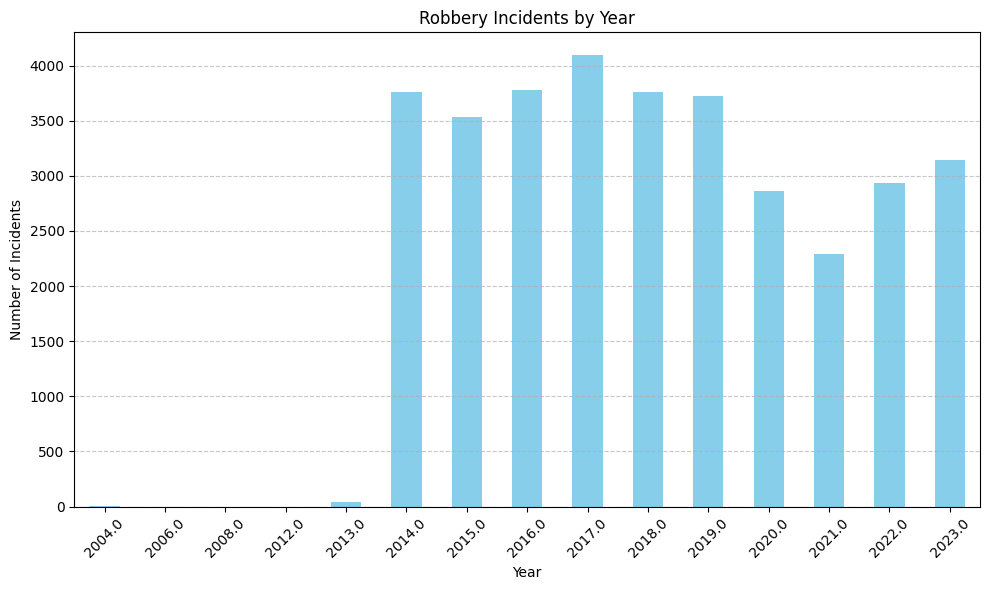

In [246]:
#checking for any outliers in the occured years column
occurred_years = df['OCC_YEAR'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
occurred_years.plot(kind='bar', color='skyblue')
plt.title('Robbery Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Given our focus on incidents occurring post-2014, we will exclude any data pertaining to events prior to this year

In [247]:
filtered_df = df[df['OCC_YEAR'] >= 2014]

# Displaying the total number of rows before dropping
print("Total number of rows before dropping:", len(df))

# Displaying the total number of rows after dropping
print("Total number of rows after dropping:", len(filtered_df))

# Dropping rows where Occurrence_Year < 2014
df = df[df['OCC_YEAR'] >= 2014]


Total number of rows before dropping: 33919
Total number of rows after dropping: 33874


Eliminate entries where the latitude and longitude values are recorded as zero.


In [248]:
# Displaying the total number of rows before dropping
print("Total number of rows before dropping:", len(df))

df = df[df['LATITUDE'] != 0]

# Displaying the total number of rows after dropping
print("Total number of rows after dropping:", len(df))


Total number of rows before dropping: 33874
Total number of rows after dropping: 32864


Eliminate entries where the Neighbourhood name and number values are recorded as NSA.

In [249]:
# Displaying the total number of rows before dropping
print("Total number of rows before dropping:", len(df))
# Drop rows where HOOD_158 or NEIGHBOURHOOD_158 is 'NSA'
df = df[(df['HOOD_158'] != 'NSA') | (df['NEIGHBOURHOOD_158'] != 'NSA')]
# Displaying the total number of rows after dropping
print("Total number of rows after dropping:", len(df))



Total number of rows before dropping: 32864
Total number of rows after dropping: 32860


In [250]:
df.describe()

,OBJECTID,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,LONGITUDE,LATITUDE
count,32860.000000,32860.000000,32860.000000,32860.000000,32860.000000,32860.000000,32860.000000,32860.000000,32860.000000,32860.000000,32860.000000
mean,16984.560256,2018.197839,15.758643,185.753226,13.631741,2018.193914,15.752739,185.689257,13.667712,-79.394872,43.709075
std,9807.333056,2.840050,8.767643,105.159363,7.231666,2.837989,8.785915,105.109545,7.284502,0.106026,0.052398
min,2.000000,2014.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,-79.626059,43.588667
25%,8472.750000,2016.000000,8.000000,95.000000,9.000000,2016.000000,8.000000,95.000000,9.000000,-79.475531,43.661876
50%,16925.500000,2018.000000,16.000000,189.000000,15.000000,2018.000000,16.000000,189.000000,16.000000,-79.390587,43.702239
75%,25514.250000,2020.000000,23.000000,278.000000,20.000000,2020.000000,23.000000,278.000000,20.000000,-79.317596,43.753868
max,33921.000000,2023.000000,31.000000,366.000000,23.000000,2023.000000,31.000000,366.000000,23.000000,-79.122044,43.837903


### Exploratory Data Analysis

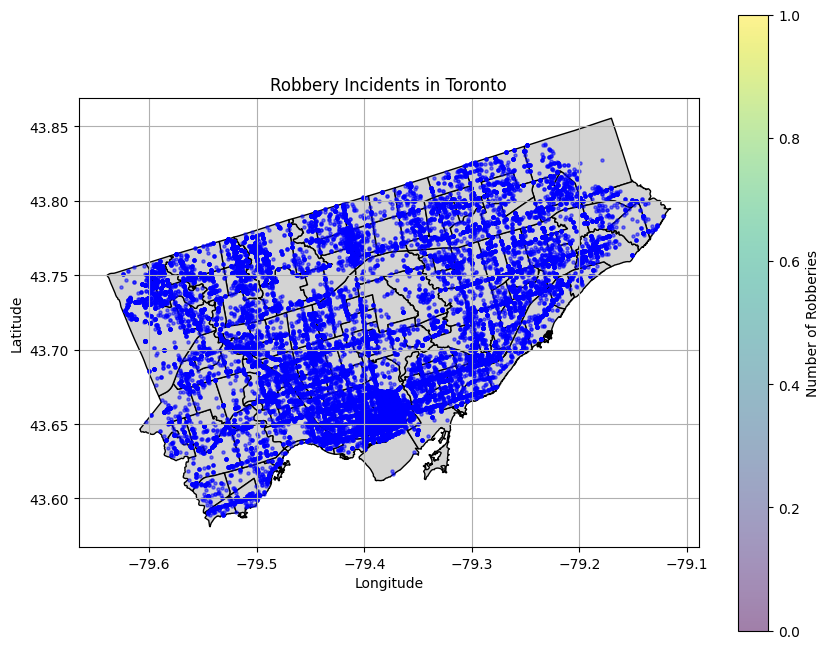

In [251]:


# Load the neighborhood shapefile
neighborhoods = gpd.read_file('Neighbourhoods - 4326.shp')

plt.figure(figsize=(10, 8))
neighborhoods.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')  # Plot the neighborhoods
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c='blue', alpha=0.5, s=5)  # Plot the robbery incidents
plt.colorbar(label='Number of Robberies')  # Add a colorbar indicating the number of robberies
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Robbery Incidents in Toronto')
plt.grid(True)
plt.show()

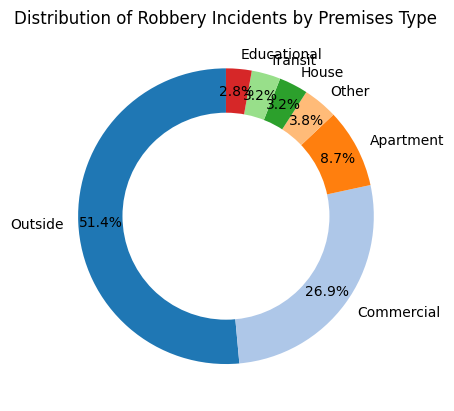

In [260]:
# Calculate incident counts per premises type
incident_counts = df['PREMISES_TYPE'].value_counts()

# Get premises types as index
premises_types = incident_counts.index.tolist()

# Plotting the donut chart
fig, ax = plt.subplots()
ax.pie(incident_counts, labels=premises_types, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=plt.cm.tab20.colors)
ax.add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Distribution of Robbery Incidents by Premises Type')
plt.show()

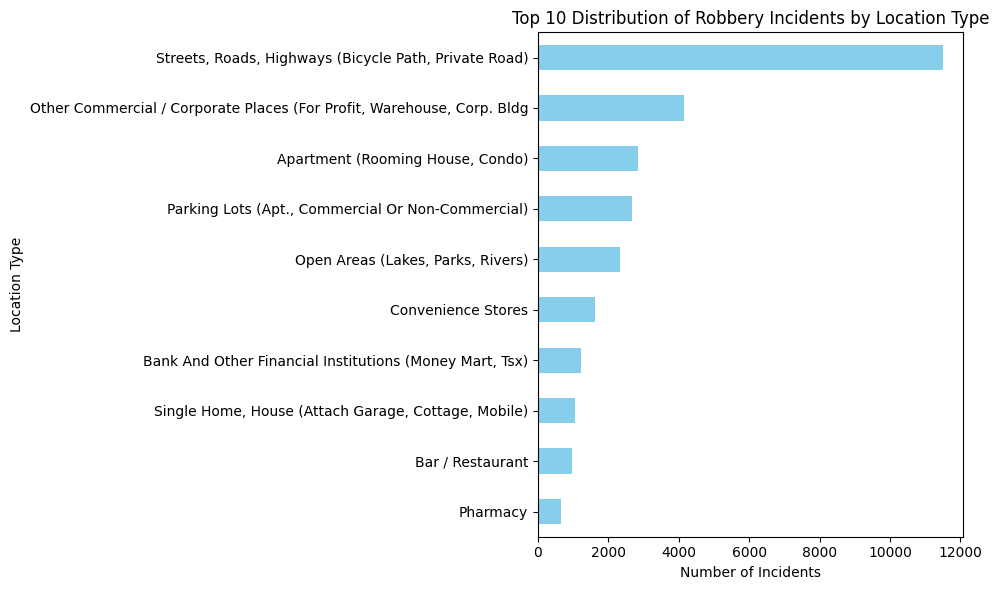

In [261]:
# Calculate incident counts per location type and sort in descending order
incident_counts = df['LOCATION_TYPE'].value_counts().head(10).sort_values(ascending=True)

# Plotting the clustered bar chart with x and y axes interchanged
plt.figure(figsize=(10, 6))
incident_counts.plot(kind='barh', color='skyblue')  # Use kind='barh' for horizontal bars
plt.ylabel('Location Type')  # Set y-label for location type
plt.xlabel('Number of Incidents')  # Set x-label for the number of incidents
plt.title('Top 10 Distribution of Robbery Incidents by Location Type')
plt.tight_layout()
plt.show()

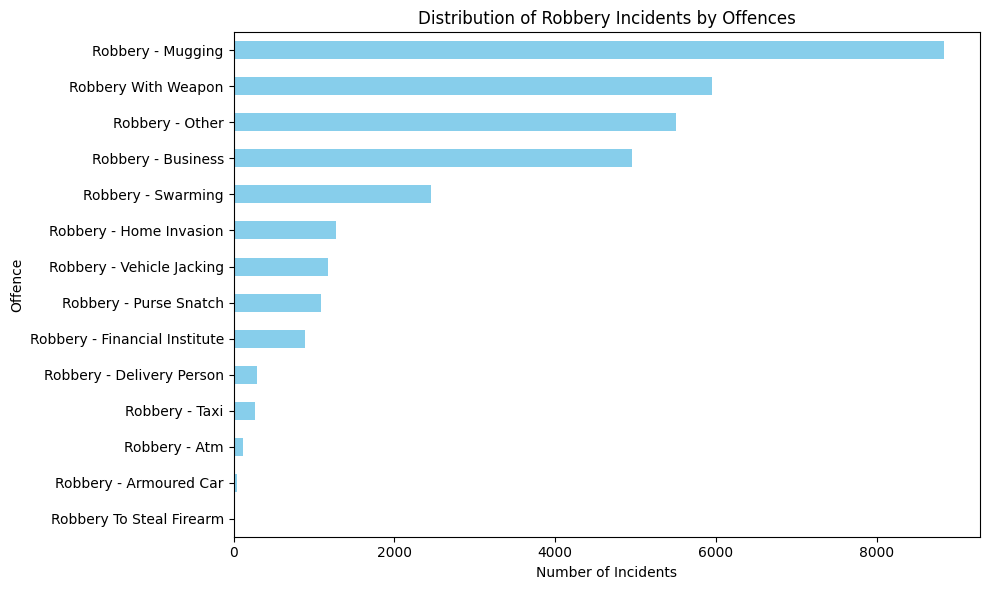

In [270]:
# Calculate incident counts per location type and sort in descending order
incident_counts = df['OFFENCE'].value_counts().sort_values(ascending=True)

# Plotting the clustered bar chart with x and y axes interchanged
plt.figure(figsize=(10, 6))
incident_counts.plot(kind='barh', color='skyblue')  # Use kind='barh' for horizontal bars
plt.ylabel('Offence')  # Set y-label for location type
plt.xlabel('Number of Incidents')  # Set x-label for the number of incidents
plt.title('Distribution of Robbery Incidents by Offences')
plt.tight_layout()
plt.show()

Robberies over the course of 10 years

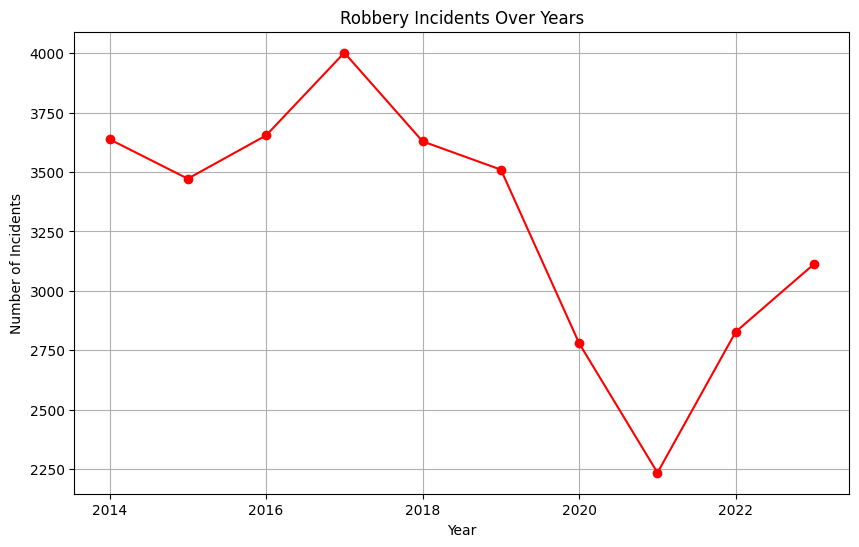

In [254]:
# Aggregate robbery incidents by year and month
yearly_incidents = df.groupby('OCC_YEAR').size()
monthly_incidents = df.groupby(['OCC_YEAR', 'OCC_MONTH']).size()

# Plotting the frequency of robbery incidents over years
plt.figure(figsize=(10, 6))
yearly_incidents.plot(kind='line', marker='o', color='r')
plt.title('Robbery Incidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()



In [255]:
# Define a custom function to parse the datetime strings
def custom_parser(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%B-%d %H:%M:%S')
    except ValueError:
        return pd.NaT  # Return NaT (Not a Time) for invalid datetime strings

# Convert relevant columns to datetime objects using the custom parser
df['report_datetime'] = df['REPORT_YEAR'].astype(int).astype(str) + '-' + df['REPORT_MONTH'] + '-' + df['REPORT_DAY'].astype(int).astype(str) + ' ' + df['REPORT_HOUR'].astype(int).astype(str) + ':00:00'
df['occurred_datetime'] = df['OCC_YEAR'].astype(int).astype(str) + '-' + df['OCC_MONTH'] + '-' + df['OCC_DAY'].astype(int).astype(str) + ' ' + df['OCC_HOUR'].astype(int).astype(str) + ':00:00'

# Apply the custom parser to the datetime strings
df['report_datetime'] = df['report_datetime'].apply(custom_parser)
df['occurred_datetime'] = df['occurred_datetime'].apply(custom_parser)

# Create a new DataFrame for temporal analysis
temporal_df = df[['report_datetime', 'occurred_datetime']].dropna()

# Set the index to the report_datetime
temporal_df.set_index('report_datetime', inplace=True)

# Group by different time periods and count the number of incidents
incidents_by_month = temporal_df.resample('M').size()  # Resample by month

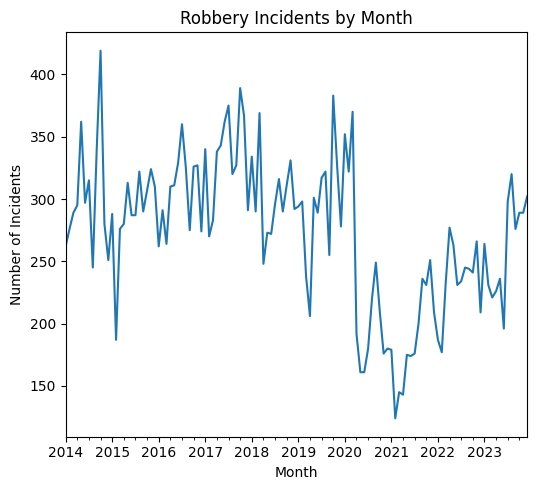

In [256]:
# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
incidents_by_month.plot()
plt.title('Robbery Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')



plt.tight_layout()
plt.show()

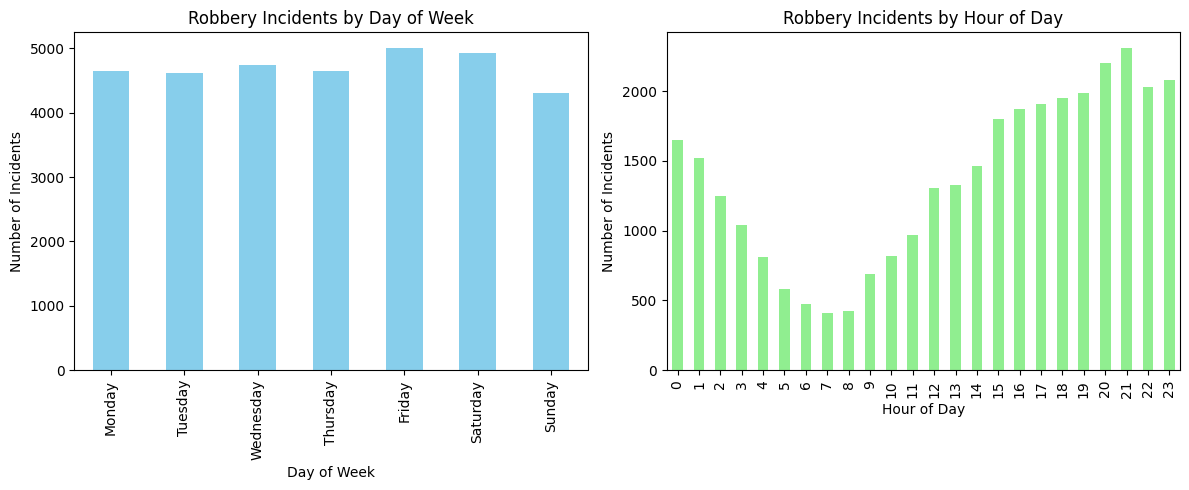

In [275]:
# Group by day of the week and calculate the count of incidents for each day
incidents_by_dayofweek = temporal_df.groupby(temporal_df.index.dayofweek).size()

# Group by hour of the day and calculate the count of incidents for each hour
incidents_by_hour = temporal_df.groupby(temporal_df.index.hour).size()

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
incidents_by_dayofweek.plot(kind='bar', color='skyblue')
plt.title('Robbery Incidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.subplot(1, 2, 2)
incidents_by_hour.plot(kind='bar', color='lightgreen')
plt.title('Robbery Incidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')


plt.tight_layout()
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_53992\546974331.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(neighborhood_time_stats.pivot('NEIGHBOURHOOD_158', 'OCC_HOUR', 'incident_count'), cmap='Reds', linewidths=0.5)


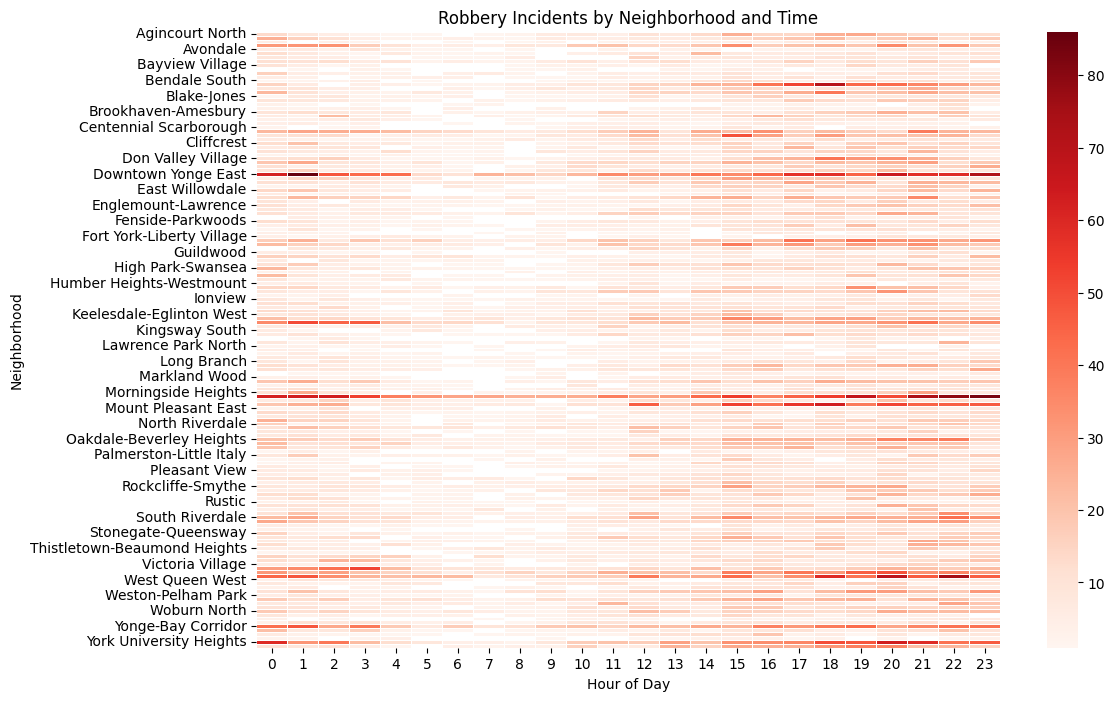

In [259]:
# Descriptive statistics by neighborhood and time
neighborhood_time_stats = df.groupby(['NEIGHBOURHOOD_158', 'OCC_HOUR']).size().reset_index(name='incident_count')

# Visualization - Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(neighborhood_time_stats.pivot('NEIGHBOURHOOD_158', 'OCC_HOUR', 'incident_count'), cmap='Reds', linewidths=0.5)
plt.title('Robbery Incidents by Neighborhood and Time')
plt.xlabel('Hour of Day')
plt.ylabel('Neighborhood')
plt.show()

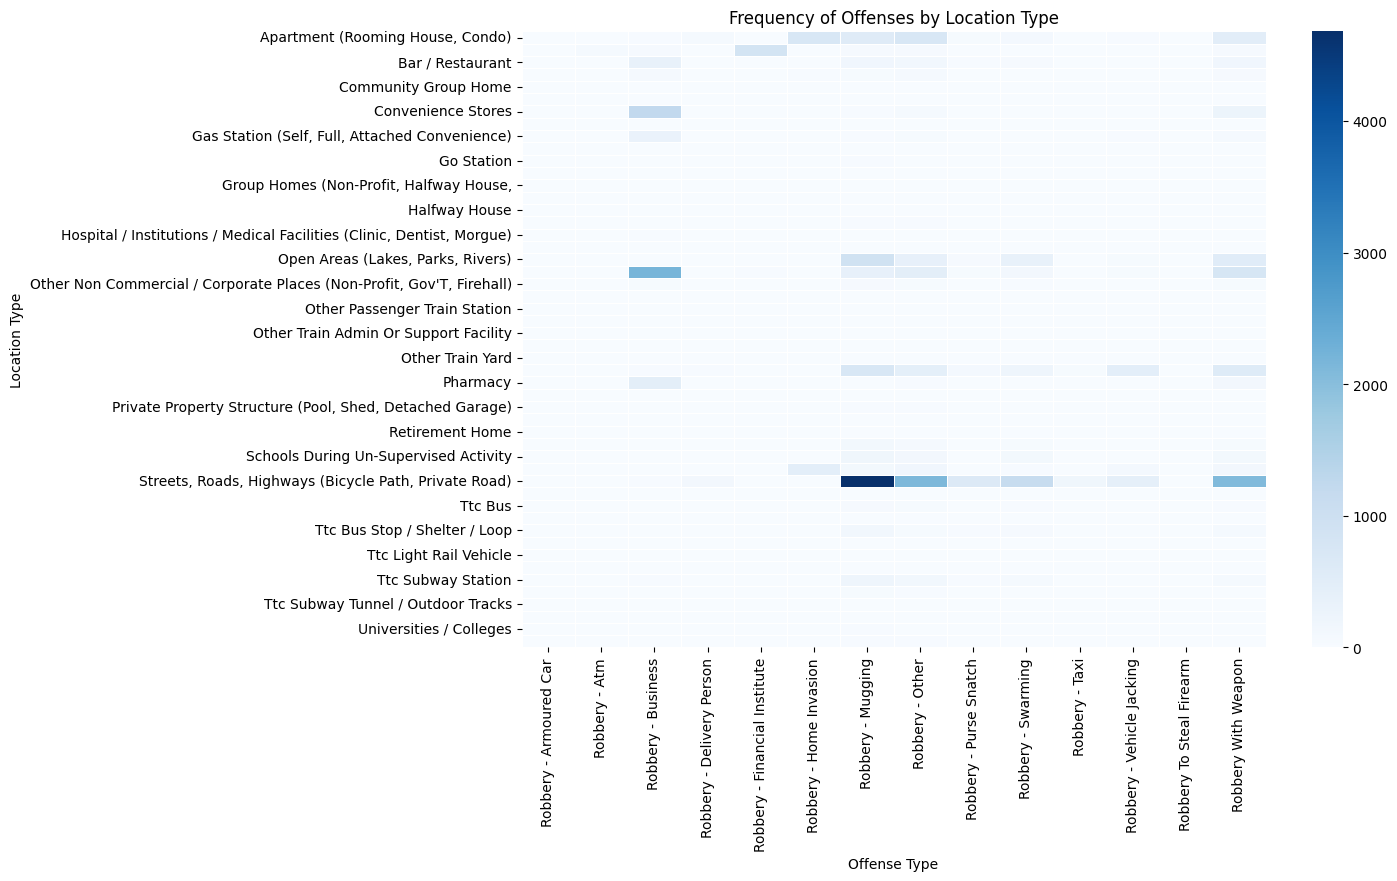

Chi-square statistic: 53468.53481795061
p-value: 0.0


In [262]:
# Create a contingency table
contingency_table = pd.crosstab(df['LOCATION_TYPE'], df['OFFENCE'])

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='Blues', linewidths=0.5)
plt.title('Frequency of Offenses by Location Type')
plt.xlabel('Offense Type')
plt.ylabel('Location Type')
plt.show()

# Perform chi-square test
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')

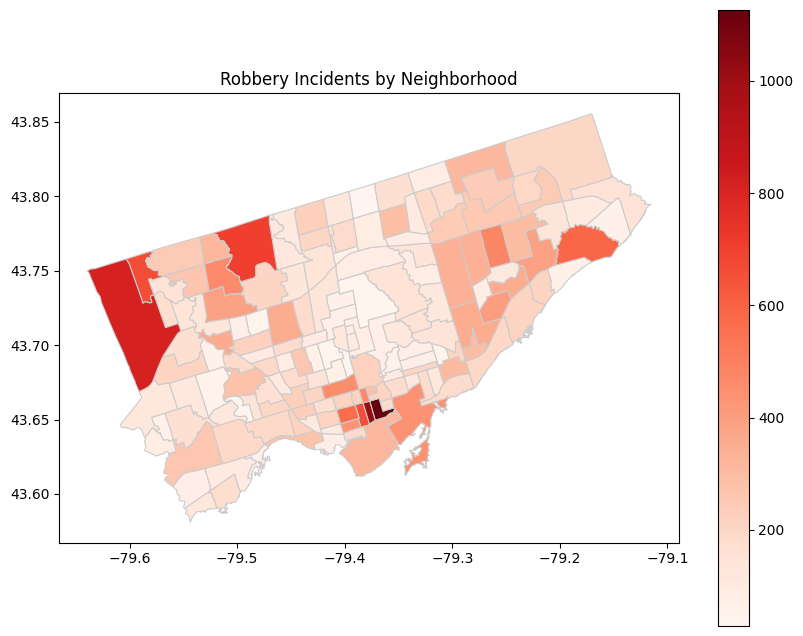

In [ ]:
# Calculate incident counts by neighborhood in df
neighborhood_counts = df.groupby('NEIGHBOURHOOD_158').size().reset_index(name='incident_count')

# Merge the incident counts with the neighborhoods data
# Adjust the column names for merging
neighborhoods = neighborhoods.merge(neighborhood_counts, left_on='AREA_NA7', right_on='NEIGHBOURHOOD_158', how='left')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
neighborhoods.plot(column='incident_count', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Robbery Incidents by Neighborhood')
plt.show()

In [253]:
# Count occurrences of each neighborhood and get the top 5
top_neighborhoods = df['NEIGHBOURHOOD_158'].value_counts().head(5)


top_neighborhoods

Moss Park                            1126
Downtown Yonge East                  1017
West Humber-Clairville                809
York University Heights               705
Mount Olive-Silverstone-Jamestown     667
Name: NEIGHBOURHOOD_158, dtype: int64

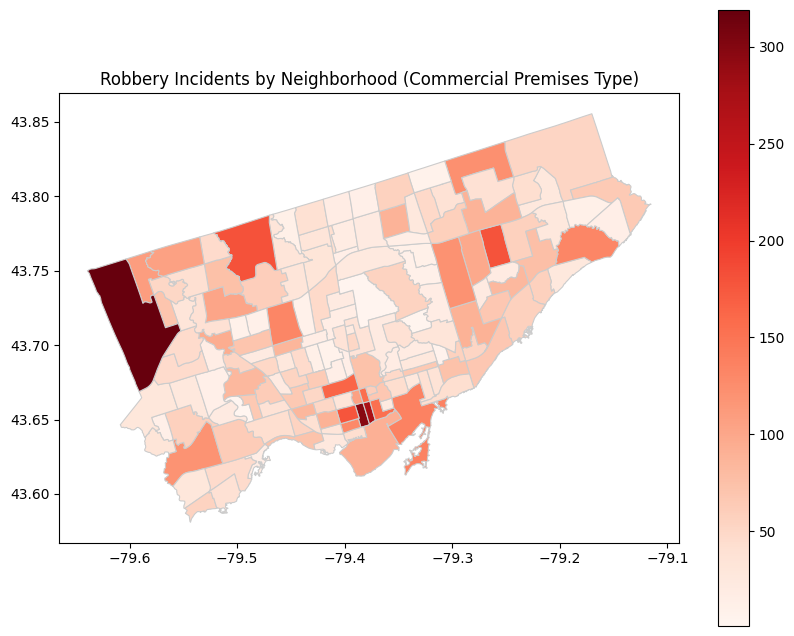

In [269]:
# Filter for only "Commercial" in the "PREMISES_TYPE" column
df_commercial = df[df['PREMISES_TYPE'] == 'Commercial']

# Calculate incident counts by neighborhood
neighborhood_counts = df_commercial.groupby('NEIGHBOURHOOD_158').size().reset_index(name='incident_count')

# Merge the incident counts with the neighborhoods data
# Adjust the column names for merging
neighborhoods = neighborhoods.merge(neighborhood_counts, left_on='AREA_NA7', right_on='NEIGHBOURHOOD_158', how='left')

# Check if the column 'incident_count' exists
if 'incident_count' not in neighborhoods.columns:
    print("Error: 'incident_count' column not found.")
else:
    # Plot the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    neighborhoods.plot(column='incident_count', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title('Robbery Incidents by Neighborhood (Commercial Premises Type)')
    plt.show()

In [264]:
neighborhood_counts.sort_values(by='incident_count', ascending=False).head()

,NEIGHBOURHOOD_158,incident_count
139,West Humber-Clairville,319
152,Yonge-Bay Corridor,297
36,Downtown Yonge East,273
156,York University Heights,180
13,Bendale-Glen Andrew,179


Analyzing data specifically related to bars and restaurants.

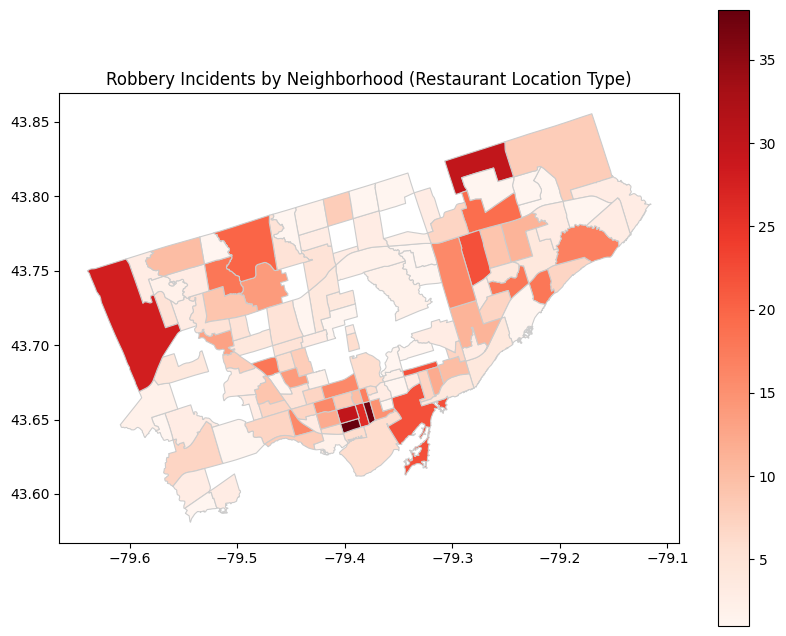

In [265]:
# Filter for only "Commercial" in the "PREMISES_TYPE" column
df_restaurant = df[df['LOCATION_TYPE'] == 'Bar / Restaurant']

# Calculate incident counts by neighborhood
neighborhood_counts = df_restaurant.groupby('NEIGHBOURHOOD_158').size().reset_index(name='incident_count')

# Merge the incident counts with the neighborhoods data
# Adjust the column names for merging
neighborhoods = neighborhoods.merge(neighborhood_counts, left_on='AREA_NA7', right_on='NEIGHBOURHOOD_158', how='left')

# Check if the column 'incident_count' exists
if 'incident_count' not in neighborhoods.columns:
    print("Error: 'incident_count' column not found.")
else:
    # Plot the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    neighborhoods.plot(column='incident_count', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title('Robbery Incidents by Neighborhood (Restaurant Location Type)')
    plt.show()

Top 5 neighbourhoods with most number of robberies by Bar / Restaurants

In [266]:
neighborhood_counts.sort_values(by='incident_count', ascending=False).head()

,NEIGHBOURHOOD_158,incident_count
110,Wellington Place,38
30,Downtown Yonge East,37
69,Milliken,30
60,Kensington-Chinatown,30
112,West Humber-Clairville,28


Neighbourhoods with least number of robberies by Bar / Restaurants

In [267]:
neighborhood_counts[neighborhood_counts['incident_count']==1]

,NEIGHBOURHOOD_158,incident_count
0,Agincourt North,1
9,Bayview Woods-Steeles,1
14,Black Creek,1
17,Broadview North,1
24,Cliffcrest,1
35,Englemount-Lawrence,1
38,Etobicoke West Mall,1
39,Fenside-Parkwoods,1
50,Highland Creek,1
51,Hillcrest Village,1
